In [20]:
!pip install yfinance --upgrade
!pip install plotly

[*********************100%***********************]  1 of 1 completed


Price        Date        Close         High          Low         Open   Volume
Ticker                  TCS.NS       TCS.NS       TCS.NS       TCS.NS   TCS.NS
0      2018-01-01  1188.961426  1211.072418  1184.197627  1205.454783  1351760
1      2018-01-02  1182.489990  1199.747435  1177.546470  1195.433047  1920290
2      2018-01-03  1185.837769  1199.477430  1182.489680  1182.849231  1257120
3      2018-01-04  1194.129639  1196.331708  1186.444669  1190.938778   913082
4      2018-01-05  1208.555908  1213.184863  1190.939021  1190.939021  1153706


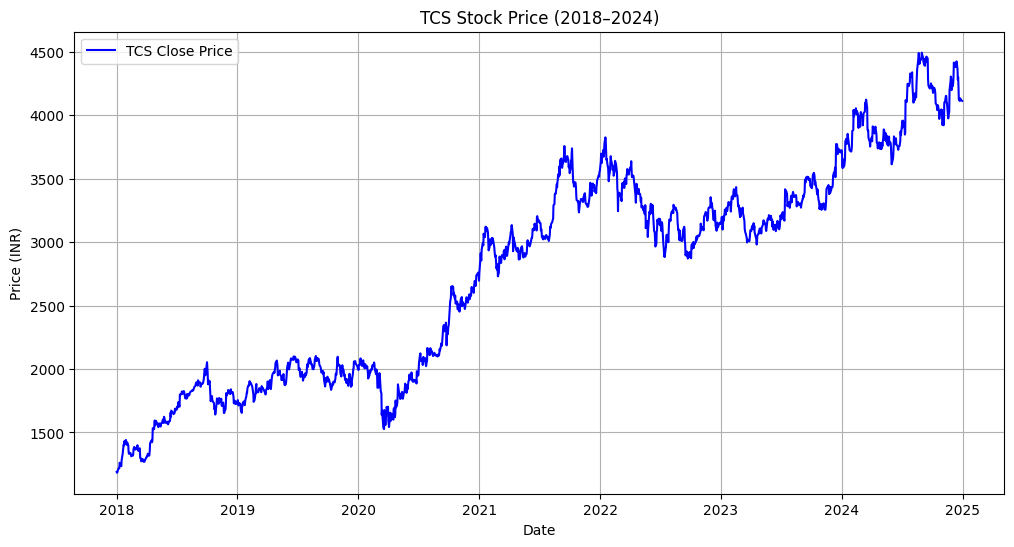

In [21]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
tcs=yf.download('TCS.NS',start='2018-01-01',end='2024-12-31')
tcs.reset_index(inplace=True)
print(tcs.head())
plt.figure(figsize=(12,6))
plt.plot(tcs['Date'],tcs['Close'],label='TCS Close Price',color='blue')
plt.title("TCS Stock Price (2018–2024)")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.grid()
plt.show()


In [22]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(tcs['Close'].dropna())
print("ADF Statistic:",result[0])
print("p-value:",result[1])
for key,value in result[4].items():
    print(f'Critical Value ({key}):{value}')


ADF Statistic: -1.244950252255201
p-value: 0.6539667175796036
Critical Value (1%):-3.4341465551936534
Critical Value (5%):-2.863216966926812
Critical Value (10%):-2.567662770090317


                               SARIMAX Results                                
Dep. Variable:                 TCS.NS   No. Observations:                 1726
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8839.160
Date:                Thu, 10 Jul 2025   AIC                          17684.320
Time:                        11:05:15   BIC                          17700.679
Sample:                             0   HQIC                         17690.372
                               - 1726                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8230      0.184     -4.482      0.000      -1.183      -0.463
ma.L1          0.8440      0.174      4.851      0.000       0.503       1.185
sigma2      1653.1545     34.304     48.191      0.0

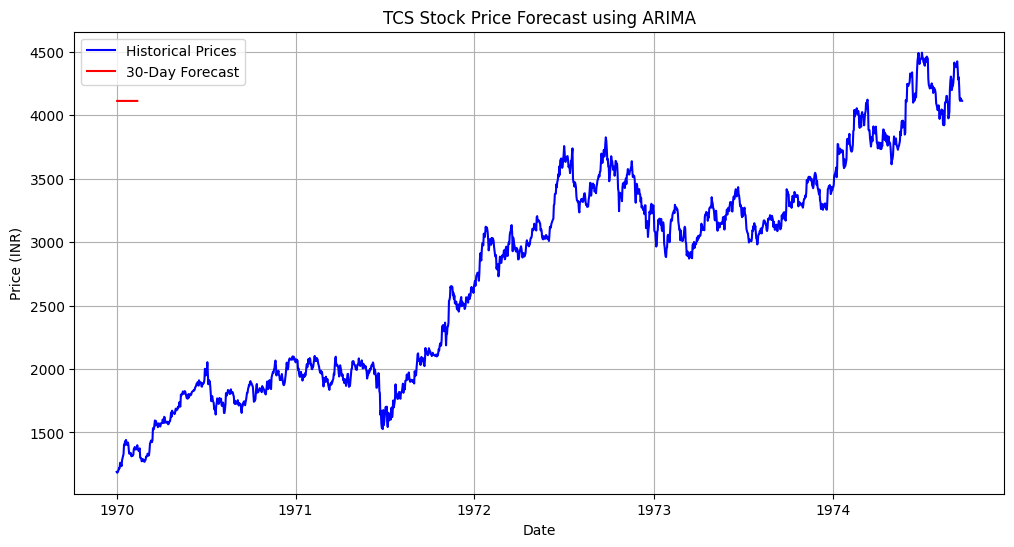

In [23]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
model=ARIMA(tcs['Close'],order=(1,1,1))
arima_result=model.fit()
print(arima_result.summary())
forecast=arima_result.forecast(steps=30)
print("Next 30 Days Forecast:\n",forecast)
plt.figure(figsize=(12,6))
plt.plot(tcs['Close'],label="Historical Prices",color='blue')
plt.plot(pd.date_range(start=tcs.index[-1],periods=31,freq='B')[1:],forecast,label="30-Day Forecast",color='red')
plt.title("TCS Stock Price Forecast using ARIMA")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.grid()
plt.show()




[*********************100%***********************]  1 of 1 completed


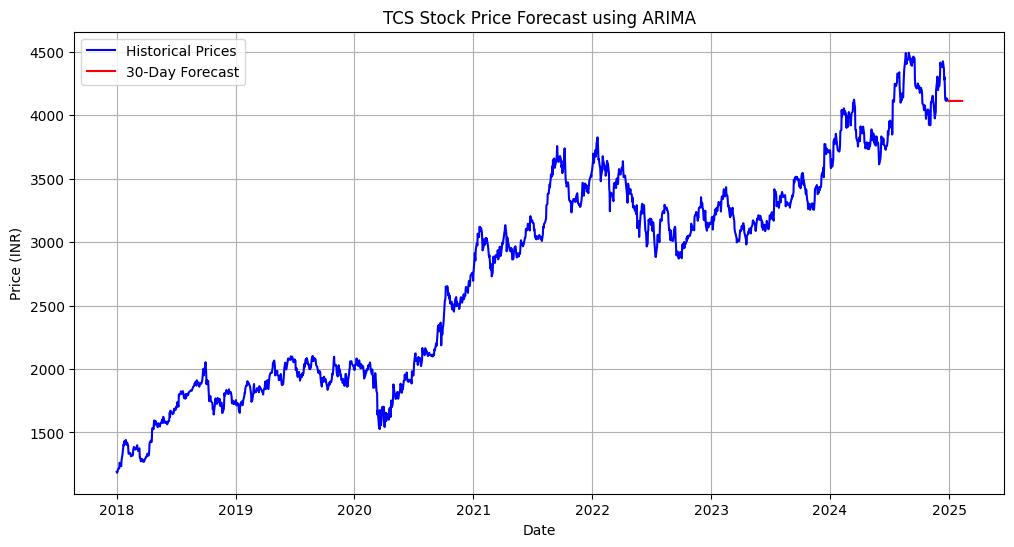

In [24]:
import yfinance as yf
tcs=yf.download('TCS.NS',start='2018-01-01',end='2024-12-31')
forecast_dates=pd.date_range(start=tcs.index[-1]+pd.Timedelta(days=1),periods=30,freq='B')
plt.figure(figsize=(12,6))
plt.plot(tcs['Close'],label="Historical Prices",color='blue')
plt.plot(forecast_dates, forecast.values,label="30-Day Forecast",color='red')
plt.title("TCS Stock Price Forecast using ARIMA")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.grid()
plt.show()

